In [1]:
!git clone https://github.com/nikhilkr31/human-action-recognition.git

Cloning into 'human-action-recognition'...
remote: Enumerating objects: 35630, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 35630 (delta 18), reused 20 (delta 4), pack-reused 35586 (from 1)
Receiving objects: 100% (35630/35630), 749.33 MiB | 25.98 MiB/s, done.
Resolving deltas: 100% (25/25), done.
Updating files: 100% (36030/36030), done.


In [32]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import glob

#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#Scikit Learn
from sklearn.model_selection import train_test_split

#Image processing
import cv2 as cv

#tensorflow
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
cd human-action-recognition/

/content/human-action-recognition


In [4]:
train_action = pd.read_csv("data/Training_set.csv")
test_action = pd.read_csv("data/Testing_set.csv")

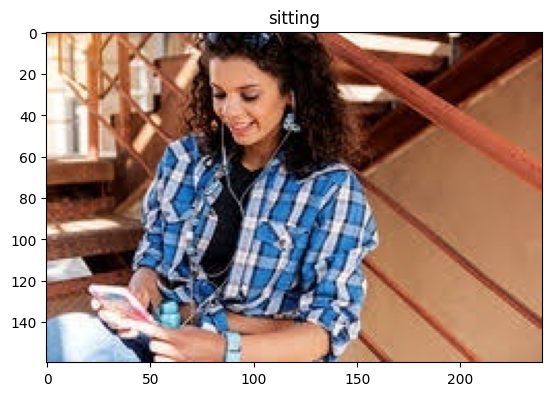

In [5]:
img = cv.imread('data/train/' + train_action.filename[0])
plt.title(train_action.label[0])
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB));

In [6]:
#Sample images and their labels in the training data


def show_img_train():
    img_num = np.random.randint(0,12599)
    img = cv.imread('data/train/' + train_action.filename[img_num])
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title(train_action.label[img_num])

def show_img_test():
    img_num = np.random.randint(0,5399)
    img = cv.imread('data/test/' + test_action.filename[img_num])
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

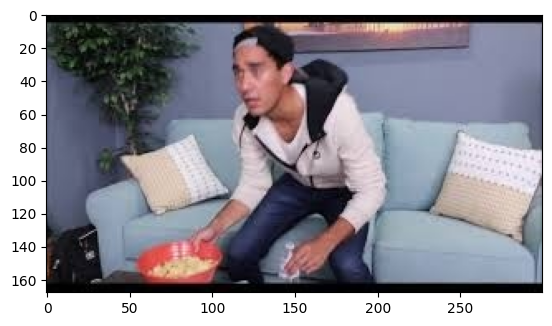

In [7]:
show_img_test()

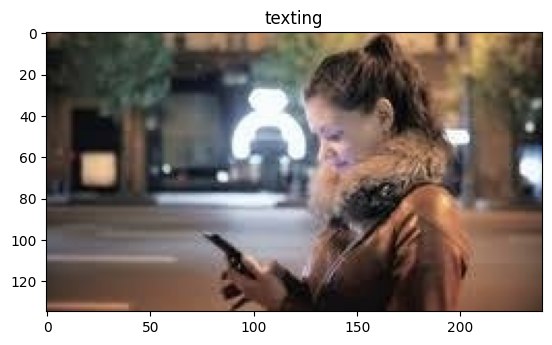

In [8]:
show_img_train()

In [9]:
width = 224
height = 224
dim = (width, height)

#resizing all the images in the train folder
for i in np.arange(len(train_action.filename)):
    #read the filename from the dataframe
    filename = train_action.filename.iloc[i]
    #read the image from the train folder
    img = cv.imread('data/train/' + filename)
    #resize the image
    resized = cv.resize(img, dim, interpolation = cv.INTER_AREA)
    #write the image in resized folder
    cv.imwrite('./resized-train/' + filename ,resized)

In [10]:
for i in np.arange(len(test_action.filename)):
    #read the filename from the dataframe
    filename = test_action.filename.iloc[i]
    #read the image from the train folder
    img = cv.imread('data/test/' + filename)
    #resize the image
    resized = cv.resize(img, dim, interpolation = cv.INTER_AREA)
    #write the image in resized folder
    cv.imwrite('./resized-test/' + filename ,resized)

(224, 224, 3)


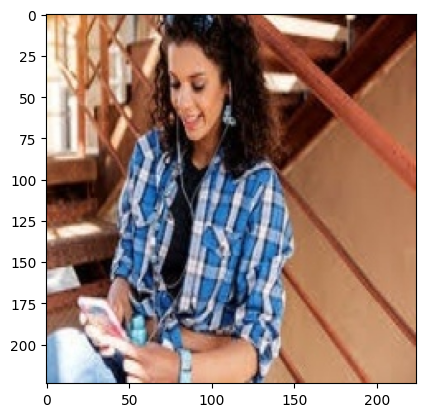

In [11]:
img = cv.imread('resized-train/' + train_action.filename[0])
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
print(img.shape)

In [12]:
#empty list train
X = []

#reading all the resized images
for i in np.arange(len(train_action.filename)):
    img = cv.imread('resized-train/' + train_action.filename[i])
    X.append(img)

X = np.asarray(X)
X.shape

(12600, 224, 224, 3)

In [13]:
Label_data = {'calling': [1,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0 ],
              'clapping': [0,1,0,0,0, 0,0,0,0,0, 0,0,0,0,0 ],
              'cycling': [0,0,1,0,0, 0,0,0,0,0, 0,0,0,0,0 ],
              'dancing': [0,0,0,1,0, 0,0,0,0,0, 0,0,0,0,0 ],
              'drinking': [0,0,0,0,1, 0,0,0,0,0, 0,0,0,0,0 ],
              'eating': [0,0,0,0,0, 1,0,0,0,0, 0,0,0,0,0 ],
              'fighting': [0,0,0,0,0, 0,1,0,0,0, 0,0,0,0,0 ],
              'hugging': [0,0,0,0,0, 0,0,1,0,0, 0,0,0,0,0 ],
              'laughing': [0,0,0,0,0, 0,0,0,1,0, 0,0,0,0,0 ],
              'listening_to_music': [0,0,0,0,0, 0,0,0,0,1, 0,0,0,0,0 ],
              'running': [0,0,0,0,0, 0,0,0,0,0, 1,0,0,0,0 ],
              'sitting': [0,0,0,0,0, 0,0,0,0,0, 0,1,0,0,0 ],
              'sleeping': [0,0,0,0,0, 0,0,0,0,0, 0,0,1,0,0 ],
              'texting': [0,0,0,0,0, 0,0,0,0,0, 0,0,0,1,0 ],
              'using_laptop': [0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,1]}

In [14]:
text_to_lable = { 0 :'calling',
              1: 'clapping',
              2:'cycling',
              3:'dancing',
              4:'drinking',
              5:'eating',
              6:'fighting',
              7:'hugging',
              8:'laughing',
              9:'listening_to_music',
              10:'running',
              11: 'sitting',
              12:'sleeping',
              13:'texting',
              14:'using_laptop'}

In [15]:
y = []
for x in train_action.label:
    if x  == 'calling':
        y.append(Label_data['calling'])
    if x  == 'clapping':
        y.append(Label_data['clapping'])
    if x  == 'cycling':
        y.append(Label_data['cycling'])
    if x  == 'dancing':
        y.append(Label_data['dancing'])
    if x  == 'drinking':
        y.append(Label_data['drinking'])
    if x  == 'eating':
        y.append(Label_data['eating'])
    if x  == 'fighting':
        y.append(Label_data['fighting'])
    if x  == 'laughing':
        y.append(Label_data['laughing'])
    if x  == 'listening_to_music':
        y.append(Label_data['listening_to_music'])
    if x  == 'running':
        y.append(Label_data['running'])
    if x  == 'sitting':
        y.append(Label_data['sitting'])
    if x  == 'sleeping':
        y.append(Label_data['sleeping'])
    if x  == 'texting':
        y.append(Label_data['texting'])
    if x  == 'using_laptop':
        y.append(Label_data['using_laptop'])
    if x  == 'hugging':
        y.append(Label_data['hugging'])

y = np.array(y)
print(y.shape)

(12600, 15)


In [16]:
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42,stratify=train_action.label)

(12600, 224, 224, 3) (12600, 15)


In [17]:
print(X_train.shape,y_train.shape)

(11340, 224, 224, 3) (11340, 15)


In [18]:
#empty list test
X_unseen = []

#reading all the resized images
for i in np.arange(len(test_action.filename)):
    img = cv.imread('resized-test/' + test_action.filename[i])
    X_unseen.append(img)

X_unseen = np.asarray(X_unseen)
X_unseen.shape

(5400, 224, 224, 3)

In [19]:
cnn_model = Sequential()

#initializing a vgg16 wihtout the top layers
#pretrained_model= tf.keras.applications.VGG16(include_top=False,
#                   input_shape=(224,224,3),
#                   pooling='avg',classes=15,
#                   weights='imagenet')

pretrained_model= tf.keras.applications.EfficientNetV2S(
    include_top=False,
    weights= 'imagenet',
    input_shape= (224,224,3),
    pooling= 'avg',
    classes= 15,
)


#Freezing the deeper layers
for layer in pretrained_model.layers:
        layer.trainable=False

#adding our layers to the model
cnn_model.add(pretrained_model)
cnn_model.add(Flatten())
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(256, activation='swish'))
cnn_model.add(Dense(15, activation='softmax'))

82420632/82420632 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [33]:
!cp /content/human-action-recognition/BEST_HAR_EfficientNetV2S_1.keras /content/drive/MyDrive

In [22]:
early_stopping_cb =  tf.keras.callbacks.EarlyStopping(patience=30,restore_best_weights=True)
lr_scheduler1 = tf.keras.callbacks.ReduceLROnPlateau(factor=0.333, patience=30)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("BEST_HAR_EfficientNetV2S_1.keras",save_best_only=True)

In [23]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
history = cnn_model.fit(X_train,y_train, epochs=60,
                        validation_data=(X_test, y_test),
                  callbacks=[early_stopping_cb,lr_scheduler1,checkpoint_cb])

Epoch 1/60
355/355 ━━━━━━━━━━━━━━━━━━━━ 138s 237ms/step - accuracy: 0.5184 - loss: 1.5128 - val_accuracy: 0.6881 - val_loss: 0.9870 - learning_rate: 0.0010
Epoch 2/60
355/355 ━━━━━━━━━━━━━━━━━━━━ 64s 101ms/step - accuracy: 0.6814 - loss: 0.9740 - val_accuracy: 0.7119 - val_loss: 0.9162 - learning_rate: 0.0010
Epoch 3/60
355/355 ━━━━━━━━━━━━━━━━━━━━ 34s 97ms/step - accuracy: 0.7133 - loss: 0.8679 - val_accuracy: 0.7095 - val_loss: 0.9227 - learning_rate: 0.0010
Epoch 4/60
355/355 ━━━━━━━━━━━━━━━━━━━━ 42s 101ms/step - accuracy: 0.7454 - loss: 0.7735 - val_accuracy: 0.7317 - val_loss: 0.8951 - learning_rate: 0.0010
Epoch 5/60
355/355 ━━━━━━━━━━━━━━━━━━━━ 41s 102ms/step - accuracy: 0.7585 - loss: 0.7147 - val_accuracy: 0.7159 - val_loss: 0.9102 - learning_rate: 0.0010
Epoch 6/60
355/355 ━━━━━━━━━━━━━━━━━━━━ 34s 96ms/step - accuracy: 0.8001 - loss: 0.6089 - val_accuracy: 0.7341 - val_loss: 0.9011 - learning_rate: 0.0010
Epoch 7/60
355/355 ━━━━━━━━━━━━━━━━━━━━ 41s 97ms/step - accuracy: 0.814

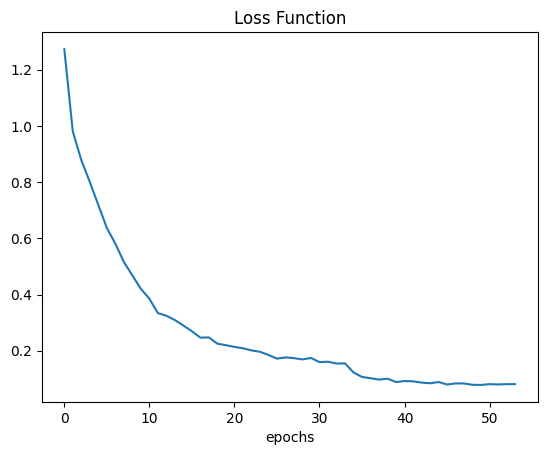

In [25]:
loss = history.history['loss']

plt.title("Loss Function")
plt.xlabel("epochs")
sns.set_theme(style='darkgrid')
sns.lineplot(loss);

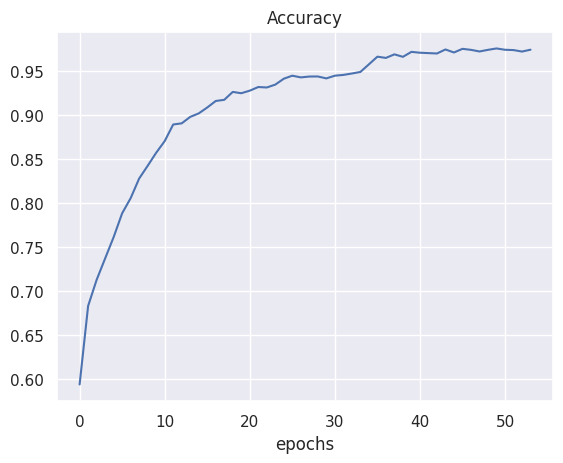

In [27]:
plt.title("Accuracy")
plt.xlabel("epochs")
accu = history.history['accuracy']
sns.lineplot(accu);

In [28]:
y_preds = cnn_model.predict(X_test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 25s 362ms/step


In [29]:
from sklearn.metrics import accuracy_score, log_loss

print('Log Loss:',log_loss(np.round(y_preds),y_test))
print('Accuracy:',accuracy_score(np.round(y_preds),y_test))

Log Loss: 4.863032600118981
Accuracy: 0.6452380952380953


In [39]:
from PIL import Image
import matplotlib.image as mimg

#reading image and resize
def read_image(fn):
    image = Image.open(fn)
    return np.asarray(image.resize((224,224)))

#predict the class and the confidence of the prediction
def test_predict(test_image):
    result = cnn_model.predict(np.asarray([read_image(test_image)]))

    itemindex = np.where(result==np.max(result))
    prediction = itemindex[1][0]
    print("probability: "+str(np.max(result)*100) + "%\nPredicted class : ", prediction)

    image = mimg.imread(test_image)
    plt.imshow(image)
    plt.title(text_to_lable[prediction])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
probability: 85.6772780418396%
Predicted class :  12


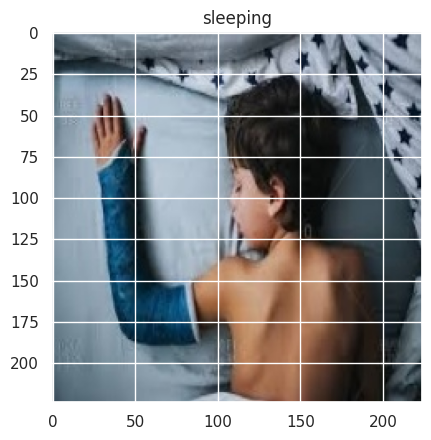

In [40]:
filename = test_action.filename.iloc[0]
test_predict('./resized-test/' + filename)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
probability: 99.39804673194885%
Predicted class :  5


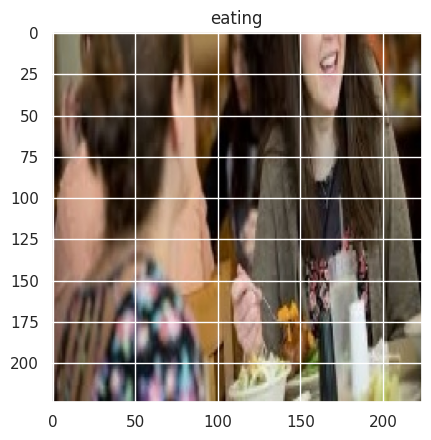

In [41]:
filename = test_action.filename.iloc[3]
test_predict('./resized-test/' + filename)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
probability: 57.071298360824585%
Predicted class :  3


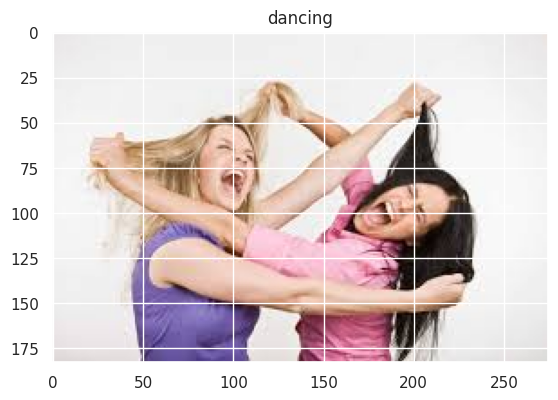

In [42]:
test_predict('/content/download.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
probability: 94.3735122680664%
Predicted class :  13


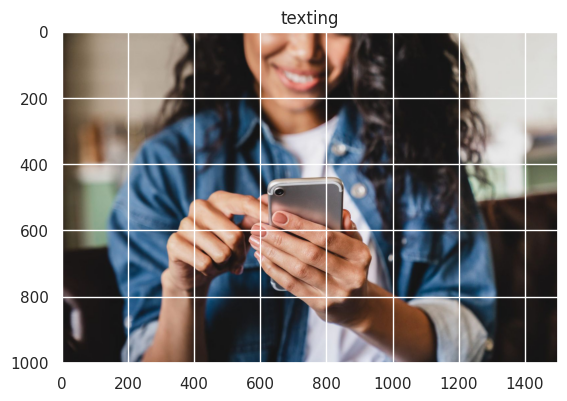

In [46]:
test_predict('/content/1681669812-GettyImages-1313901506-2000-9655bb4687a54c368e28908ac5e902f9.jpg')